In [1]:
import sys,time
sys.path.append('../')
from smodels.theory.tree import Tree
from smodels.theory.auxiliaryFunctions import bracketToProcessStr
import numpy as np
import networkx as nx

### Convert (old) bracket notation string to (new) process string

In [2]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
bracketToProcessStr(stringEl)

'(PV > anyOdd(1),anyOdd(2)), (anyOdd(1) > anyOdd(3),e-,nu), (anyOdd(3) > MET,jet,jet), (anyOdd(2) > MET,L,nu)'

In [3]:
stringEl = "[ [['e-','nu'], ['jet','jet'] ], [ ['L','nu'] ] ]"
procString = bracketToProcessStr(stringEl,finalState=['MET','HSCP'],intermediateState=[['squark','gluino'],['squark']])
print(procString)

(PV > squark(1),squark(2)), (squark(1) > gluino(3),e-,nu), (gluino(3) > MET,jet,jet), (squark(2) > HSCP,L,nu)


In [4]:
stringEl = "[ [ ['jet','jet'] ], [ ['L','nu'] ] ]"
bracketToProcessStr(stringEl,finalState=['MET','HSCP'],intermediateState=[['gluino'],['squark']])

'(PV > gluino(1),squark(2)), (gluino(1) > MET,jet,jet), (squark(2) > HSCP,L,nu)'

### Convert process string to graph

In [5]:
T = Tree(procString)

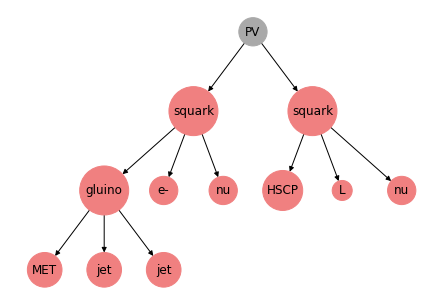

In [6]:
T.draw()

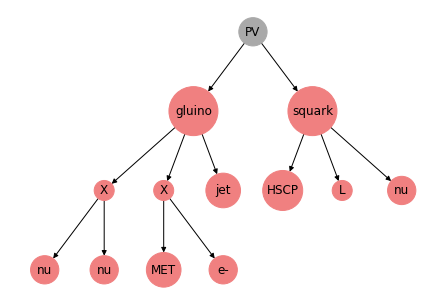

In [7]:
proc = '(PV > gluino(1),squark(2)), (gluino(1) > X(3),X(4),jet), (squark(2) > HSCP,L,nu), (X(3) > nu,nu), (X(4) > MET,e-)'
T = Tree(proc)
T.draw()